# Spectroscopy of a three 2D cavity system 

1. **Introduction**
2. **Problem parameters**
3. **Setting up the operators and the Hamiltonian's**
4. **Computing and plotting the eigenfrequencies of the coupled system**

<u>Author</u> : Soumya Shreeram (shreeramsoumya@gmail.com)<br>
<u>Supervisor</u> : Yu-Chin Chao (ychao@fnal.gov) <br>
<u>Date</u>$\ \ \ \$: July 2019<br>

This script was coded as part of the Helen Edwards Summer Internship program at Fermilab.

The hamiltonian for such a system with two qubits with frequencies $v_{Q,1}$, $v_{Q,2}$, and $n$ mode filter can be described as,

$$ \hat{H}_{F} = \sum_{i=1}^{n}h\ v_{F}\ \hat{a}^{\dagger}_i \hat{a}_i +  \sum_{i=2}^{n}h\ g_{F}\ (\hat{a}^{\dagger}_i \hat{a}_{i-1} + \hat{a}^{\dagger}_{i-1} \hat{a}_i)$$

where $\hat{a}_i$ creates a photon in the $i^{th}$ resonantor, and $g_F$ is the filter-filter coupling.

The code calculates the eigen modes for such a system for a range of frequencies.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
import numpy as np
from math import pi
from qutip import *

## 2. Problem parameters

In [56]:
"""------------- FREQUENCIES --------------------"""
w_f = 2*pi*7.1      # Resonator/ Filter frequency

"""------------- COUPLING --------------------"""
g_f1 = 2*pi*0.118    # Filter-filter coupling
g_f2 = 2*pi*0.344 

numF = 3            # number of filters (CASE 1)
numF6 = 6           # number of filters (CASE 2)
N = 2               # number of fock states 

kappa = 1.0/0.129   # cavity dissipation rate
n_th_a = 0.063      # avg. no. of thermal bath excitation
r1 = 0.0075           # qubit relaxation rate
r2 = 0.0025           # qubit dephasing rate

times = np.linspace(0,100,800)

## 3. Setting up the operators and the Hamiltonian's

In [57]:
def numOp(m):
  """
  Computes the number operator 
  @param loweringMat :: lowering matrix operator for a system
  """
  return m.dag()*m

def rwaCoupling(m1, m2):
    return m1.dag()*m2 + m1*m2.dag()

In [127]:
# cavity 1, 2, 3 destruction operators
a1 = tensor(destroy(N), qeye(N), qeye(N))
a2 = tensor(qeye(N), destroy(N), qeye(N))
a3 = tensor(qeye(N), qeye(N), destroy(N))

# Filter Hamiltonians (refer formula in the Introduction)
Hf = numOp(a1) + numOp(a2) + numOp(a3)    
H_f12 = g_f1*(rwaCoupling(a1, a2) + rwaCoupling(a2, a3))
 
H_3 = w_f*Hf + H_f12 # Resultant Hamiltonian

# collapse operators
c_ops = []

H_3

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[  0.           0.           0.           0.           0.
    0.           0.           0.        ]
 [  0.          44.61061568   0.74141587   0.           0.
    0.           0.           0.        ]
 [  0.           0.74141587  44.61061568   0.           0.74141587
    0.           0.           0.        ]
 [  0.           0.           0.          89.22123136   0.
    0.74141587   0.           0.        ]
 [  0.           0.           0.74141587   0.          44.61061568
    0.           0.           0.        ]
 [  0.           0.           0.           0.74141587   0.
   89.22123136   0.74141587   0.        ]
 [  0.           0.           0.           0.           0.
    0.74141587  89.22123136   0.        ]
 [  0.           0.           0.           0.           0.
    0.           0.         133.83184704]]

In [120]:
def compute(w_qList, H, N, numF):
  """
  Computes the Eigen-vales and states for a given qubit frequency
  @param w_qList :: range of qubit frequencies
  @param H_q1 :: Qubit 1 independent Hamiltonian 
  @param N :: Number of Fock states
  @param sz1 :: z matrix for qubit 1
  """
  evals_mat = np.zeros((len(w_qList), N**numF))
  for i, w_qi in enumerate(w_qList):
    evals, evecs = H.eigenstates()
    evals_mat[i,:] = evals
  return evals_mat

def spiltFreq(evals_mat, n1):
    wf_splittings = []
    for n in n1:
        wf_splittings.append((evals_mat[0, n]-evals_mat[0, 0])/(2*pi))
        
    print(['Split frequency %2d = %.2f'%(i, wf) for i, wf in enumerate(wf_splittings)])    
    return 

def setLabels(ax, numF):
    ax.set_xlabel('Qubit 1 frequency sweep (GHz)')
    ax.set_ylabel('Eigenenergies (GHz)')
    ax.set_title('Energy Spectrum for %.1f cavities'%numF)
    return 

def plotEnergySplitting(n1, w_q1List, evals_mat, numF):
    fig,ax = plt.subplots(figsize=(8,5))
    
    for n in n1:
      ax.plot(w_q1List / (2 * pi), (evals_mat[:, n] - evals_mat[:, 0])/ (2 * pi), lw=2)
    setLabels(ax, numF)
    return  

## 4. Computing and plotting the eigenfrequencies of the coupled system

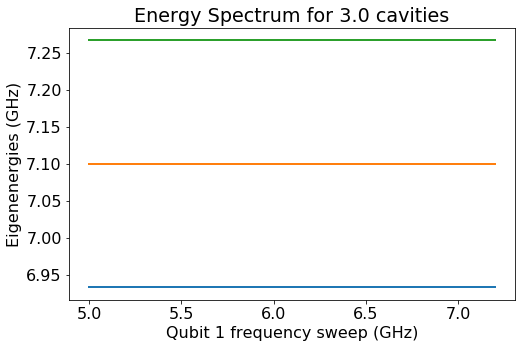

In [121]:
# range of qubit 1 frequencies
w_q1List = np.linspace(5,7.2,100)*2*pi

# computes the eigenvalue matrix for ranger of frequencies
evals_mat = compute(w_q1List, H_3, N, numF)

# plots the energy splitting due to coupling
plotEnergySplitting(n1, w_q1List, evals_mat, numF)

In [115]:
# shows the split frequencies
spiltFreq(evals_mat, n1)

['Split frequency  0 = 6.93', 'Split frequency  1 = 7.10', 'Split frequency  2 = 7.27']


[6.933122799639975, 7.1, 7.266877200360025]

## 5. Following the same procedure for a 6 cavity and 2-qubit system

### 5.1 Setting up the operators, Hamiltonian, and the initial state $\psi_0$

$$ \hat{H}_{F} = \sum_{i=1}^{n}h\ v_{F}\ \hat{a}^{\dagger}_i \hat{a}_i +  \sum_{i=2}^{n}h\ g_{F}\ (\hat{a}^{\dagger}_i \hat{a}_{i-1} + \hat{a}^{\dagger}_{i-1} \hat{a}_i)$$

In [128]:
def sumHamiltonians(some_list):
    """
    Function sums the Hamiltonians in the list
    @param some_list :: list containing the terms to be summed over
    @return H :: Hamiltonian with the required sum
    """
    H = 0
    for some in some_list:
        H += numOp(some)
    return H    

def sumCoupling(a_list):
    """
    Function sums the Hamiltonians in the list under the RWA approx
    @param a_list :: list containing the terms to be summed over
    @return H :: Hamiltonian with the required sum
    """
    H = 0
    i = 1
    for i in range(len(a_list)):
        H = rwaCoupling(a_list[i], a_list[i-1])
    return H    

In [138]:
# operators
a_1 = tensor(destroy(N), qeye(N), qeye(N), qeye(N), qeye(N), qeye(N))
a_2 = tensor(qeye(N), destroy(N), qeye(N), qeye(N), qeye(N), qeye(N))
a_3 = tensor(qeye(N), qeye(N), destroy(N), qeye(N), qeye(N), qeye(N))
a_4 = tensor(qeye(N), qeye(N), qeye(N), destroy(N), qeye(N), qeye(N))
a_5 = tensor(qeye(N), qeye(N), qeye(N), qeye(N), destroy(N), qeye(N))
a_6 = tensor(qeye(N), qeye(N), qeye(N), qeye(N), qeye(N), destroy(N))

a_list = [a_1, a_2, a_3, a_4, a_5, a_6]

# Cavity Hamiltonian and coupling Hamiltonian
H_f = w_f*sumHamiltonians(a_list)
H_gf = g_f1*(rwaCoupling(a_1, a_2)+rwaCoupling(a_2, a_3)+rwaCoupling(a_3, a_4)+rwaCoupling(a_5, a_6))

# resultant Hamiltonian for 6 cavities
H_6 = H_f + H_gf
H_6

Quantum object: dims = [[2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2]], shape = (64, 64), type = oper, isherm = True
Qobj data =
[[  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.          44.61061568   0.74141587 ...   0.           0.
    0.        ]
 [  0.           0.74141587  44.61061568 ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ... 223.0530784    0.74141587
    0.        ]
 [  0.           0.           0.         ...   0.74141587 223.0530784
    0.        ]
 [  0.           0.           0.         ...   0.           0.
  267.66369409]]

### 5.2 Computing the energy splitting and plotting the result

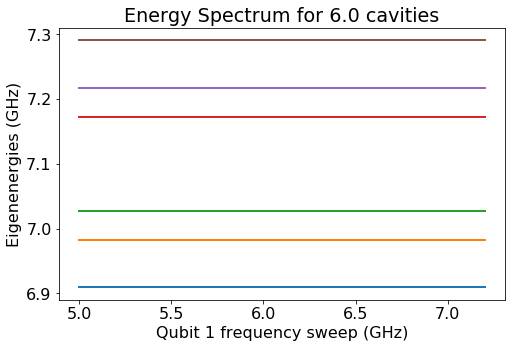

In [140]:
n2 = [1, 2, 3, 4, 5, 6]

# computes the eigenvalue matrix for ranger of frequencies
evals_mat_6 = compute(w_q1List, H_6, N, numF6)

# plots the energy splitting due to coupling
plotEnergySplitting(n2, w_q1List, evals_mat_6, numF6)

In [141]:
spiltFreq(evals_mat_6, n2)

['Split frequency  0 = 6.91', 'Split frequency  1 = 6.98', 'Split frequency  2 = 7.03', 'Split frequency  3 = 7.17', 'Split frequency  4 = 7.22', 'Split frequency  5 = 7.29']
